In [380]:
import pandas as pd
import glob

In [381]:
filenames = glob.glob("year*.xls")
filenames

['year2014.xls',
 'year2006.xls',
 'year2012.xls',
 'year2013.xls',
 'year2007.xls',
 'year2005.xls',
 'year2004.xls',
 'year2010.xls',
 'year2009.xls',
 'year2008.xls']

In [382]:
dataframe = []
for filename in filenames:
    df = pd.read_excel(filename)
    df['filename'] = filename  
    df['year'] = df['filename'].str.extract(r"(\d\d\d\d).xls")
    dataframe.append(df)

years = pd.concat(dataframe, ignore_index=True, sort=True)
years.head()

,1st Births,1st Births.1,2nd Births,2nd Births.1,3rd Births and over,3rd Births and over.1,Age,Average Number of Childbearing Woman (person),Births(person),Fertility Rate (‰),filename,year
0,7092.0,22.96,3431.0,11.11,490.0,1.59,Total,308867.0,11022.0,35.68,year2014.xls,2014
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,year2014.xls,2014
2,244.0,7.32,17.0,0.50,1.0,0.02,15-19,33282.0,261.0,7.84,year2014.xls,2014
3,2.0,0.34,NaN,0.03,NaN,NaN,15,6088.0,2.0,0.38,year2014.xls,2014
4,13.0,1.95,1.0,0.08,NaN,NaN,16,6784.0,14.0,2.03,year2014.xls,2014


In [383]:
# years.dropna(subset=['Age'], inplace=True)
# years.head()

In [384]:
years = years.rename(columns={"1st Births.1": "1st Births.rate", "2nd Births.1": "2nd Births.rate", "3rd Births and over.1": "3rd Births and over.rate"})

In [385]:
years = years.sort_values(by='year', ascending = True)
years.head()

,1st Births,1st Births.rate,2nd Births,2nd Births.rate,3rd Births and over,3rd Births and over.rate,Age,Average Number of Childbearing Woman (person),Births(person),Fertility Rate (‰),filename,year
326,128.0,9.81,314.0,24.13,43.0,3.31,32,13015.0,485.0,37.25,year2004.xls,2004
320,706.0,72.28,270.0,27.66,42.0,4.35,27,9763.0,1018.0,104.29,year2004.xls,2004
319,824.0,93.17,224.0,25.30,34.0,3.90,26,8846.0,1082.0,122.37,year2004.xls,2004
318,1030.0,121.19,175.0,20.54,29.0,3.45,25,8496.0,1234.0,145.19,year2004.xls,2004
317,3440.0,70.86,1344.0,27.68,190.0,3.91,25-29,48555.0,4974.0,102.44,year2004.xls,2004


In [386]:
years = years.drop(columns=['filename'])
years.head()

,1st Births,1st Births.rate,2nd Births,2nd Births.rate,3rd Births and over,3rd Births and over.rate,Age,Average Number of Childbearing Woman (person),Births(person),Fertility Rate (‰),year
326,128.0,9.81,314.0,24.13,43.0,3.31,32,13015.0,485.0,37.25,2004
320,706.0,72.28,270.0,27.66,42.0,4.35,27,9763.0,1018.0,104.29,2004
319,824.0,93.17,224.0,25.30,34.0,3.90,26,8846.0,1082.0,122.37,2004
318,1030.0,121.19,175.0,20.54,29.0,3.45,25,8496.0,1234.0,145.19,2004
317,3440.0,70.86,1344.0,27.68,190.0,3.91,25-29,48555.0,4974.0,102.44,2004


In [387]:
years_small = years[['Age', 'Fertility Rate (‰)', '1st Births.rate', '2nd Births.rate', '3rd Births and over.rate', 'year']]


In [388]:
years_small

,Age,Fertility Rate (‰),1st Births.rate,2nd Births.rate,3rd Births and over.rate,year
326,32,37.25,9.81,24.13,3.31,2004
320,27,104.29,72.28,27.66,4.35,2004
319,26,122.37,93.17,25.30,3.90,2004
318,25,145.19,121.19,20.54,3.45,2004
317,25-29,102.44,70.86,27.68,3.91,2004
316,24,157.39,137.86,16.04,3.49,2004
315,23,153.35,137.67,12.82,2.87,2004
314,22,138.40,128.89,7.99,1.51,2004
313,21,102.05,96.58,4.59,0.89,2004
321,28,84.42,49.18,31.43,3.81,2004


In [389]:
years_small[years_small['Age'] == ' Total']

,Age,Fertility Rate (‰),1st Births.rate,2nd Births.rate,3rd Births and over.rate,year
304,Total,38.01,26.12,10.10,1.79,2004
204,Total,34.99,23.02,10.62,1.36,2007


In [390]:
years_total = years_small[years_small['Age'].str.contains('Total', na=False)]
years_total 

,Age,Fertility Rate (‰),1st Births.rate,2nd Births.rate,3rd Births and over.rate,year
304,Total,38.01,26.12,10.10,1.79,2004
255,Total,38.29,26.53,10.44,1.32,2005
51,Total,34.44,21.68,10.90,1.85,2006
204,Total,34.99,23.02,10.62,1.36,2007
448,Total,37.46,25.04,11.05,1.37,2008
397,Total,38.83,26.22,11.18,1.43,2009
347,总计 Total,36.14,24.24,10.60,1.30,2010
102,Total,29.75,19.75,8.72,1.29,2012
153,Total,35.89,23.38,10.92,1.58,2013
0,Total,35.68,22.96,11.11,1.59,2014


In [391]:
filenames2 = glob.glob("year*.csv")
filenames2

['year2015.csv', 'year2016.csv']

In [392]:
dataframe2 = []
for filename2 in filenames2:
    df2 = pd.read_csv(filename2,encoding = "ISO-8859-1")
    df2['filename2'] = filename2  
    df2['year'] = df2['filename2'].str.extract(r"(\d\d\d\d).csv")
    dataframe2.append(df2)

years2 = pd.concat(dataframe2, ignore_index=True, sort=True)
years2.head()

,1st Births,1st Births.1,2nd Births,2nd Births.1,3rd Births and over,3rd Births and over.1,Age,Average Number of Childbearing Woman (person),Births(person),Fertility Rate (¡ë),Unnamed: 10,Unnamed: 11,Unnamed: 12,filename2,year
0,6553.0,21.5,4082.0,13.40,735.0,2.41,Total,304733,11377,37.33,NaN,NaN,NaN,year2015.csv,2015
1,318.0,10.06,28.0,0.89,7.0,NaN,15-19,31623,354,11.19,NaN,NaN,NaN,year2015.csv,2015
2,5.0,0.87,NaN,NaN,NaN,NaN,15,5732,5,0.87,NaN,NaN,NaN,year2015.csv,2015
3,18.0,2.83,NaN,NaN,NaN,NaN,16,6091,16,2.63,NaN,NaN,NaN,year2015.csv,2015
4,52.0,8.59,3.0,0.50,NaN,NaN,17,6055,55,9.08,NaN,NaN,NaN,year2015.csv,2015


In [393]:
# years2.dropna(subset=['Age'], inplace=True)
# years2.head()

In [394]:
years2 = years2.rename(columns={"1st Births.1": "1st Births.rate", "2nd Births.1": "2nd Births.rate", "3rd Births and over.1": "3rd Births and over.rate", "Fertility Rate (¡ë)" : "Fertility Rate (‰)"})

In [395]:
years2.head()

,1st Births,1st Births.rate,2nd Births,2nd Births.rate,3rd Births and over,3rd Births and over.rate,Age,Average Number of Childbearing Woman (person),Births(person),Fertility Rate (‰),Unnamed: 10,Unnamed: 11,Unnamed: 12,filename2,year
0,6553.0,21.5,4082.0,13.40,735.0,2.41,Total,304733,11377,37.33,NaN,NaN,NaN,year2015.csv,2015
1,318.0,10.06,28.0,0.89,7.0,NaN,15-19,31623,354,11.19,NaN,NaN,NaN,year2015.csv,2015
2,5.0,0.87,NaN,NaN,NaN,NaN,15,5732,5,0.87,NaN,NaN,NaN,year2015.csv,2015
3,18.0,2.83,NaN,NaN,NaN,NaN,16,6091,16,2.63,NaN,NaN,NaN,year2015.csv,2015
4,52.0,8.59,3.0,0.50,NaN,NaN,17,6055,55,9.08,NaN,NaN,NaN,year2015.csv,2015


In [396]:
years2_small = years2[['Age', 'Fertility Rate (‰)', '1st Births.rate', '2nd Births.rate', '3rd Births and over.rate', 'year']]

In [397]:
years2_small

,Age,Fertility Rate (‰),1st Births.rate,2nd Births.rate,3rd Births and over.rate,year
0,Total,37.33,21.5,13.400000,2.41,2015
1,15-19,11.19,10.06,0.890000,NaN,2015
2,15,0.87,0.87,NaN,NaN,2015
3,16,2.63,2.83,NaN,NaN,2015
4,17,9.08,8.59,0.500000,NaN,2015
5,18,15.52,13.52,1.540000,0.31,2015
6,19,24.59,21.83,2.070000,0.69,2015
7,20-24,79.77,60.46,17.960000,1.33,2015
8,20,46.55,42.17,4.380000,0.13,2015
9,21,65.17,54.29,10.010000,0.75,2015


In [398]:
years2_total = years2_small[years2_small['Age'].str.contains('Total', na=False)]
years2_total 

,Age,Fertility Rate (‰),1st Births.rate,2nd Births.rate,3rd Births and over.rate,year
0,Total,37.33,21.5,13.4,2.41,2015
43,Total,30.93,16.43,12.3,2.21,2016


In [399]:
frames = [years_total , years2_total]
total_years = pd.concat(frames)
total_years

,Age,Fertility Rate (‰),1st Births.rate,2nd Births.rate,3rd Births and over.rate,year
304,Total,38.01,26.12,10.10,1.79,2004
255,Total,38.29,26.53,10.44,1.32,2005
51,Total,34.44,21.68,10.90,1.85,2006
204,Total,34.99,23.02,10.62,1.36,2007
448,Total,37.46,25.04,11.05,1.37,2008
397,Total,38.83,26.22,11.18,1.43,2009
347,总计 Total,36.14,24.24,10.60,1.30,2010
102,Total,29.75,19.75,8.72,1.29,2012
153,Total,35.89,23.38,10.92,1.58,2013
0,Total,35.68,22.96,11.11,1.59,2014


In [400]:
total_years['Age'] = total_years['Age'].str.extract(r"\s(\w+)")

In [401]:
total_years

,Age,Fertility Rate (‰),1st Births.rate,2nd Births.rate,3rd Births and over.rate,year
304,Total,38.01,26.12,10.10,1.79,2004
255,NaN,38.29,26.53,10.44,1.32,2005
51,Total,34.44,21.68,10.90,1.85,2006
204,Total,34.99,23.02,10.62,1.36,2007
448,NaN,37.46,25.04,11.05,1.37,2008
397,NaN,38.83,26.22,11.18,1.43,2009
347,Total,36.14,24.24,10.60,1.30,2010
102,NaN,29.75,19.75,8.72,1.29,2012
153,NaN,35.89,23.38,10.92,1.58,2013
0,NaN,35.68,22.96,11.11,1.59,2014


In [402]:
total_years = total_years.append({'Age': "Total", 'Fertility Rate (‰)': '0', '1st Births.rate': '0', '2nd Births.rate': '0', '3rd Births and over.rate':'0', 'year': '2011'},ignore_index=True)
total_years

,Age,Fertility Rate (‰),1st Births.rate,2nd Births.rate,3rd Births and over.rate,year
0,Total,38.01,26.12,10.1,1.79,2004
1,NaN,38.29,26.53,10.44,1.32,2005
2,Total,34.44,21.68,10.9,1.85,2006
3,Total,34.99,23.02,10.62,1.36,2007
4,NaN,37.46,25.04,11.05,1.37,2008
5,NaN,38.83,26.22,11.18,1.43,2009
6,Total,36.14,24.24,10.6,1.3,2010
7,NaN,29.75,19.75,8.72,1.29,2012
8,NaN,35.89,23.38,10.92,1.58,2013
9,NaN,35.68,22.96,11.11,1.59,2014


In [403]:
total_years['1st Births.rate'] = total_years['1st Births.rate'].astype(float)

In [404]:
total_years['2nd Births.rate'] = total_years['2nd Births.rate'].astype(float)

In [405]:
total_years['3rd Births and over.rate'] = total_years['3rd Births and over.rate'].astype(float)

In [406]:
total_years = total_years.sort_values(by='year', ascending = False)
total_years.dtypes

Age                          object
Fertility Rate (‰)           object
1st Births.rate             float64
2nd Births.rate             float64
3rd Births and over.rate    float64
year                         object
dtype: object

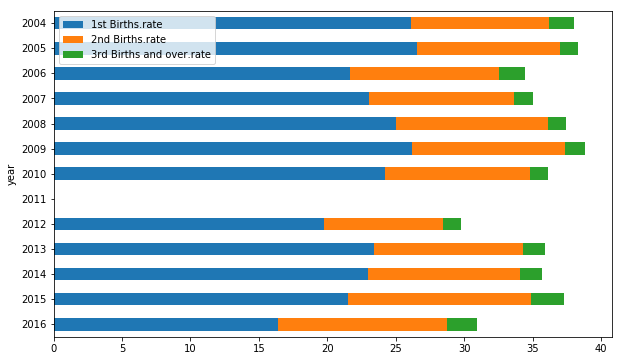

In [409]:
total_years.plot(kind='barh', x ='year', y= ['1st Births.rate', '2nd Births.rate', '3rd Births and over.rate'], stacked =True, figsize=(10,6))